# **Otimização de Processos (COQ897)** 
# *Prof. Argimiro R. Secchi*

$\
$

Segunda Lista de Exercícios - 2020

$\
$

***José Rodrigues Torraca Neto***

$\
$

4) A engenheira Fiona, responsável pela operação da Unidade de Extração por Solvente (UES) de uma indústria química, recebeu a incumbência de encontrar condições operacionais que fossem lucrativas para a UES para evitar o seu desligamento. A avaliação econômica realizada pela Eng. Fiona resultou na seguinte função lucro:

>$L(\boldsymbol{x})=a-\frac{b}{x_{1}}-cx_{2}-d\frac{x_{1}}{x_{2}}$

, em que $x_{1}$ e $x_{2}$ são as razões mássicas do produto que deixam
cada estágio de extração na corrente rafinada, 

com $x_{1}\leq 0,02$ e $x_{2}\leq x_{1}$, 

e $a = 129,93, b = 0,5, c = 4000, d = 25$ são constantes.

 A condição de operação atual é dada por:
$x_{1} = 0,015$ e $x_{2} = 0,001$. 

(a) Qual é o valor da função lucro na condição atual? 

(b) Qual a
condição de máximo lucro encontrada pela Eng. Fiona e o valor da função lucro nessa
nova condição, sabendo que a solução foi irrestrita? 

(c) Mostre que a nova condição é
realmente um ponto de máximo; 

(d) Após operar vários meses nessa nova condição, a
falta de solvente no mercado aumentou em quatro vezes o seu preço, modificando as
constantes da função lucro para $a = 279,72, b = 2,0, c = 4000, d = 100$. Se a planta
continuasse a operar nas mesmas condições encontradas em (b), qual seria o valor da
função lucro? Qual foi a decisão tomada pela Eng. Fiona nessa nova condição do
mercado? Por quê?

$\\
$

## ***Solução:***

***(a)*** O problema se resume a encontrar o valor da função lucro:

>$L(\boldsymbol{x})=a-\frac{b}{x_{1}}-cx_{2}-d\frac{x_{1}}{x_{2}}$

, com as constantes: $a = 129,93, b = 0,5, c = 4000, d = 25$

e impondo:

$x_{1} = 0,015$ e $x_{2} = 0,001 \\
$

In [ ]:
#Definindo a função lucro:

def f(x1, x2, a=129.93, b=0.5, c=4000, d=25):
    return a-(b/x1)-(c*x2)-(d*(x1/x2))

#Impondo x1 e x2:

result = f(0.015,0.001)

print(result)

-282.4033333333333


***Resposta: (a)*** O valor da função lucro atual é $L(x) = -282,4$.

***(b)*** O problema consiste em encontrar a condição de máximo lucro $(x_{1},x_{2})^{max}$ e o valor da função lucro nesta condição:

>$L(\boldsymbol{x})=a-\frac{b}{x_{1}}-cx_{2}-d\frac{x_{1}}{x_{2}}$

, com as constantes: $a = 129,93, b = 0,5, c = 4000, d = 25$

e sem restrições (mas impondo limites para $x_{1} \ e \ x_{2}$ como valores positivos e menores ou iguais a 1, para serem fisicamente consistentes, já que são razões mássicas).

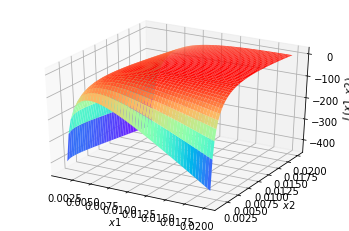

In [ ]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize

#Verificando a forma da superfície:

from matplotlib import cm

x1 = np.linspace(1E-3, 2E-2, 50)
x2 = np.linspace(1E-3, 2E-2, 50)
X, Y = np.meshgrid(x1, x2)

Z = 129.93 - 0.5/X - 4000*Y - 25*(X/Y)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Z, cmap=cm.rainbow)

ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')
ax.set_zlabel('$L(x1,x2)$');

In [ ]:
## Conceitualmente, a maximização é análoga à minimização: para encontrar 

#o máximo da função f, basta encontrar o mínimo de −f.

## Para efetuar a minimização, utilizaremos a função scipy.optimize.minimize.

## Seu uso tem a seguinte sintaxe:

#scipy.optimize.minimize (fun, x0)

#sendo os argumentos:

#fun: função que deve ser minimizada, definida previamente (f);

#x0: estimativa inicial do mínimo.

## A função minimize também fornece uma interface para vários algoritmos

#de minimização com restrição. Como exemplo, o algoritmo de otimização 

#Sequential Least SQuares Programming (SLSQP) será considerado aqui.

## Esse algoritmo permite lidar com problemas de otimização com restrições 

#de igualdade (eq) e desigualdade (ineq).

## Definindo a função objetivo - lucro (func):

def func(x, a=129.93, b=0.5, c=4000, d=25, sign=-1.0):
    return sign*(a - b/x[0] - c*x[1] - d*x[0]/x[1])

## Definindo a função das derivadas de f em relação a x1 e x2 (func_deriv):

def func_deriv(x, a=129.93, b=0.5, c=4000, d=25, sign=-1.0):
    dfdx0 = sign*(0 + b/(x[0])**2 + 0 - d/x[1])
    dfdx1 = sign*(0 + 0 - c + d*x[0]/(x[1])**2)
    return np.array([ dfdx0, dfdx1 ])

#Observe que, uma vez que 'minimize' apenas minimiza funções, 

#o parâmetro de sinal (sign) é introduzido para multiplicar a função objetivo

#(e sua derivada) por -1, para realizar uma maximização.

## Definindo as condições de contorno (limites físicos do problema: 

# 0 < x1 <= 1; 0 < x2 <= 1) como

# um objeto 'bounds' do scipy:

from scipy.optimize import Bounds
bounds = Bounds([1E-9, 1E-9], [1.0, 1.0])

#Tivemos que impor [1E-9, 1E-9] e não [0, 0] porque senão o método 

#acaba fazendo uma divisão por zero.

## (OPCIONAL) Em seguida, as restrições são definidas como uma sequência de 

#dicionários (Python), com as teclas type, fun e jac (default x >= 0).

## Definindo as restrições de desigualdade x1 <= 0,02, x2 <= x1:

ineq_cons = {'type': 'ineq',
             'fun' : lambda x: np.array([0.02 - x[0],
                                         x[0] - x[1]]),
             'jac' : lambda x: np.array([[-1.0, 0.0],
                                         [1.0, -1.0]])}

#Em Python, existe um conceito bastante poderoso e integrado à linguagem 

#que é chamado de expressão LAMBDA ou forma lambda. 

#O conceito em si é bastante simples: 

#consiste em uma função que é atribuida a um objeto. 

#Por conter a palavra reservada lambda o objeto se comportará como uma função, 

#e podemos usar funções anônimas dentro de outras funções.

In [ ]:
#Agora, pode ser feita uma otimização sem restrições

#(apenas com os limites físicos 'bounds'):

x0 = np.array([0.99, 0.1])
res = minimize(func, x0, jac=func_deriv,
               method='SLSQP', options={'ftol': 1e-9, 'disp': True},
               bounds = bounds)
print(res.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -19.409055040270935
            Iterations: 31
            Function evaluations: 55
            Gradient evaluations: 27
[0.01357208 0.00921004]


In [ ]:
#E a otimização com restrições (OPCIONAL - constraints = ineq_cons):

x0 = np.array([0.5, 0.5])
res = minimize(func, x0, jac=func_deriv, constraints=ineq_cons,
               method='SLSQP', options={'ftol': 1e-9, 'disp': True},
               bounds = bounds)
print(res.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -19.409055040739943
            Iterations: 14
            Function evaluations: 21
            Gradient evaluations: 14
[0.01357208 0.00921008]


In [ ]:
#Resultado em notação científica:

scientific_notation1 = "{:.2e}".format(res.x[0])

scientific_notation2 = "{:.2e}".format(res.x[1])

print(scientific_notation1 + "," + scientific_notation2)

1.36e-02,9.21e-03


In [ ]:
#Valor da função objetivo (lucro) no ponto máximo:

#Lembrar de alterar o sinal novamente para sign=1.0:

def func(x, a=129.93, b=0.5, c=4000, d=25, sign=1.0):
    return sign*(a - b/x[0] - c*x[1] - d*x[0]/x[1])

result = func([1.36E-2, 9.21E-3])

print(result)

19.40889889506292


***Resposta: (b)***  A condição de máximo lucro é $(x_{1}; \ x_{2})^{max} = (1,36 \cdot 10^{-2}; \ 9,21 \cdot 10^{-3})$ e o valor da função lucro nessa nova condição é $L(x) = 19,41$. 

***(c)*** Podemos verificar se o ponto encontrado é um ponto de máximo, analisando a matriz Hessiana $H(x)$:

Como já calculamos o jacobiano no item anterior, temos:

>$ L(\boldsymbol{x})=a-\frac{b}{x_{1}}-cx_{2}-d\frac{x_{1}}{x_{2}}

\\
\nabla L(x) = 
 \begin{pmatrix}
  \frac{b}{x_{1}^{2}}-\frac{d}{x_{2}}  \\
 -c+d\frac{x_{1}}{x_{2}^{2}}
 \end{pmatrix}
\\
$

Calculando a matriz Hessiana:
>$
H(x) = 
 \begin{pmatrix}
  -\frac{2b}{x_{1}^{3}} & \ +\frac{d}{x_{2}^{2}}  \\
  \frac{d}{x_{2}^{2}} & \  -2d\frac{x_{1}}{x_{2}^{3}}
 \end{pmatrix}
 \\
 $

Podemos analisar a matriz Hessiana diretamente no ponto ótimo $ x^* = 
 \begin{pmatrix}
  1,36 \cdot 10^{-2} \\
  9,21 \cdot 10^{-3}
 \end{pmatrix}:
 \\
 $

 >$
 H(x^*) = 
 \begin{pmatrix}
  -400001  & 294722 \\
  294722 & -868613
 \end{pmatrix}
 \\
 $

 Como a matriz $H(x^*)$ é apenas simétrica, e não diagonal neste ponto, temos que calcular seus autovalores $(\lambda)$:

In [14]:
H = np.array([[-400001, 294722],
              [294722, -868613]])

sigma = np.linalg.eigvals(H)
sigma

array([ -257796.23133594, -1010817.76866406])

In [27]:
#Verifica se os autovalores são positivos:

import numpy as np

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

is_pos_def(H)

False

$
\\
$
>$ 

 \lambda = 
 \begin{pmatrix}
  -257796 \\
  -1010818
 \end{pmatrix}
 \\
 $

***Resposta: (c)*** Como todos seus autovalores são negativos, a matriz  $H(x^*)$ é negativa definida no ponto $ x^* = 
 \begin{pmatrix}
  1,36 \cdot 10^{-2} \\
  9,21 \cdot 10^{-3}
 \end{pmatrix};
 \\
 $ o que implica em um ponto de máximo local.

***(c) Método alternativo:*** Apesar do Python não ser naturalmente uma linguagem de programação com métodos simbólicos, é possível importar uma biblioteca que utiliza métodos simbólicos ***(Sympy)***, e então calcular as matrizes do Jacobiano e Hessiana diretamente, quando os problemas são simples o suficiente:

A renderização de equações Sympy requer que o MathJax esteja disponível em cada saída de célula. A seguir temos uma função que fará isso acontecer:

In [19]:
from IPython.display import Math, HTML
def enable_sympy_in_cell():
  display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/"
               "mathjax/2.7.3/latest.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', enable_sympy_in_cell)

In [ ]:
from sympy import Function, hessian, Matrix, init_printing
from sympy.abc import x, y
init_printing

##Definindo a função L(x1,x2):
x1, x2, a, b, c, d = symbols('x1 x2 a b c d')
f = a-(b/x1)-(c*x2)-(d*(x1/x2))
f

In [ ]:
Matrix([f]).jacobian([x1, x2])

⎡ b    d        d⋅x₁⎤
⎢─── - ──  -c + ────⎥
⎢  2   x₂         2 ⎥
⎣x₁             x₂  ⎦

In [ ]:
hessian(f, (x1,x2))

⎡-2⋅b      d    ⎤
⎢─────    ───   ⎥
⎢   3       2   ⎥
⎢ x₁      x₂    ⎥
⎢               ⎥
⎢  d    -2⋅d⋅x₁ ⎥
⎢ ───   ────────⎥
⎢   2       3   ⎥
⎣ x₂      x₂    ⎦

In [ ]:
##Substituindo as constantes 'a,b,c,d' na função lucro original:

import sympy as sp
from sympy import *
import numpy as np
x1, x2 = sp.symbols('x1 x2', real=True)
f = 129.93-(0.5/x1)-(4000*x2)-(25*(x1/x2))

F = sp.Matrix([f])

F

⎡  25⋅x₁                      0.5⎤
⎢- ───── - 4000⋅x₂ + 129.93 - ───⎥
⎣    x₂                        x₁⎦

In [ ]:
##Calculando a função hessiana: 

H = hessian(f, (x1,x2))

H

⎡-1.0      25  ⎤
⎢─────    ───  ⎥
⎢   3       2  ⎥
⎢ x₁      x₂   ⎥
⎢              ⎥
⎢  25   -50⋅x₁ ⎥
⎢ ───   ───────⎥
⎢   2       3  ⎥
⎣ x₂      x₂   ⎦

In [ ]:
##Calculando a função hessiana no ponto ótimo [0.01357208, 0.00921008]: 

Hp = hessian(f, [x1,x2]).subs([(x1,0.01357208), (x2,0.00921008)])

Hp

⎡-400000.714671238  294722.439673709 ⎤
⎢                                    ⎥
⎣294722.439673709   -868612.765371583⎦

In [ ]:
##Finalmente calculamos os autovalores de H no ponto ótimo:

Hp.eigenvals()

Esses autovalores são negativos, e a notação :1, significa que possuem multiplicidade algébrica 1.

***(c) Adicional:*** Também podemos demonstrar que o ponto encontrado é um ponto de máximo plotando o gráfico (superfície 3d) e curvas de níveis da função objetivo $L(x)$:

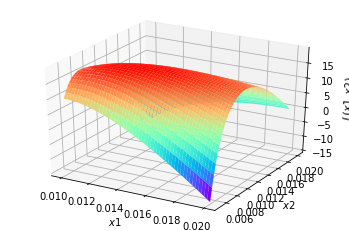

In [ ]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize

#Verificando a forma da superfície:

from matplotlib import cm

x1 = np.linspace(1E-2, 2E-2, 50)
x2 = np.linspace(5E-3, 2E-2, 50)
X, Y = np.meshgrid(x1, x2)

Z = 129.93 - 0.5/X - 4000*Y - 25*(X/Y)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Z, cmap=cm.rainbow)

ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')
ax.set_zlabel('$L(x1,x2)$');

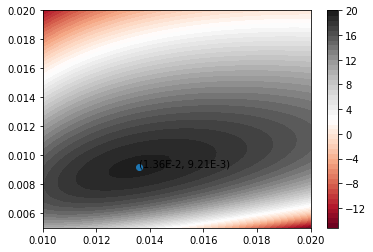

In [ ]:
#Plotando superfície de contorno (com colorbar) - com ponto de máximo indicado:

plt.contourf(X, Y, Z, 50, cmap='RdGy')
plt.colorbar();
plt.scatter([1.36E-2], [9.21E-3])
plt.annotate("(1.36E-2, 9.21E-3)", (1.36E-2, 9.21E-3))
plt.show()

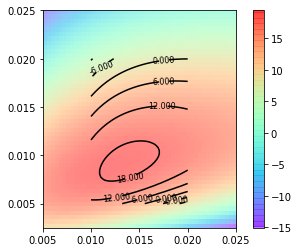

In [ ]:
#Plotando superfície de contorno (com colorbar) - com labels:

contours = plt.contour(X, Y, Z, 5, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0.005, 0.025, 0.0025, 0.025], origin='lower',
           cmap='rainbow', alpha=0.5)
plt.colorbar();

Text(0, 0.5, '$x2$')

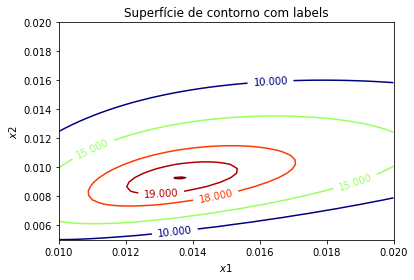

In [ ]:
#Plot superfície de contorno (padrão) - com labels:

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, [10,15,18,19, 19.4], cmap='jet')
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Superfície de contorno com labels')
ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')

***(d)*** Temos a mesma forma da função objetivo $L(x)$, mas com constantes diferentes:

$a=279,72;\ b=2,0; \ c=4000; \ d=100$.

In [ ]:
#Valor da nova função objetivo (lucro) no ponto máximo da letra(b):

#Lembrar de alterar o sinal novamente para sign=1.0:

def func(x, a=279.72, b=2.0, c=4000, d=100, sign=1.0):
    return sign*(a - b/x[0] - c*x[1] - d*x[0]/x[1])

result = func([1.36E-2, 9.21E-3])

print(result)

-51.844404419748344


In [ ]:
## Vamos fazer uma maximização para a nova função objetivo:

def func(x, a=279.72, b=2.0, c=4000, d=100, sign=-1.0):
    return sign*(a - b/x[0] - c*x[1] - d*x[0]/x[1])

## Definindo a função das derivadas de f em relação a x1 e x2 (func_deriv):

def func_deriv(x, a=279.72, b=2.0, c=4000, d=100, sign=-1.0):
    dfdx0 = sign*(0 + b/(x[0])**2 + 0 - d/x[1])
    dfdx1 = sign*(0 + 0 - c + d*x[0]/(x[1])**2)
    return np.array([ dfdx0, dfdx1 ])

## Definindo as condições de contorno:

from scipy.optimize import Bounds
bounds = Bounds([1E-9, 1E-9], [1.0, 1.0])

## Definindo as restrições de desigualdade x1 <= 0,02, x2 <= x1:

ineq_cons = {'type': 'ineq',
             'fun' : lambda x: np.array([0.02 - x[0],
                                         x[0] - x[1]]),
             'jac' : lambda x: np.array([[-1.0, 0.0],
                                         [1.0, -1.0]])}

In [ ]:
#Agora, pode ser feita uma otimização sem restrições

#(apenas com os limites físicos 'bounds'):

x0 = np.array([0.5, 0.5])
res = minimize(func, x0, jac=func_deriv,
               method='SLSQP', options={'ftol': 1e-9, 'disp': True},
               bounds = bounds)
print(res.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.2246699827823875
            Iterations: 16
            Function evaluations: 27
            Gradient evaluations: 16
[0.02154434 0.02320799]


In [ ]:
#E a otimização com restrições (OPCIONAL - constraints = ineq_cons):

x0 = np.array([0.5, 0.5])
res = minimize(func, x0, jac=func_deriv, constraints=ineq_cons,
               method='SLSQP', options={'ftol': 1e-9, 'disp': True},
               bounds = bounds)
print(res.x)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.2800000000520271
            Iterations: 9
            Function evaluations: 14
            Gradient evaluations: 9
[0.02 0.02]


In [ ]:
#Valor da função objetivo (lucro) no ponto máximo (sem restrições):

#Lembrar de alterar o sinal novamente para sign=1.0:

def func(x, a=279.72, b=2.0, c=4000, d=100, sign=1.0):
    return sign*(a - b/x[0] - c*x[1] - d*x[0]/x[1])

result = func([2.15E-2, 2.32E-2])

print(result)

1.2243303929431022


In [ ]:
#Valor da função objetivo (lucro) no ponto máximo (com restrições):

#Lembrar de alterar o sinal novamente para sign=1.0:

def func(x, a=279.72, b=2.0, c=4000, d=100, sign=1.0):
    return sign*(a - b/x[0] - c*x[1] - d*x[0]/x[1])

result = func([2E-2, 2E-2])

print(result)

-0.2799999999999727


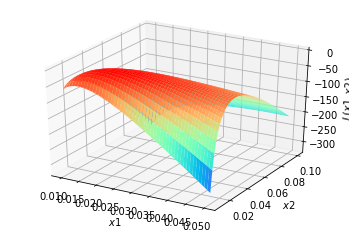

In [ ]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize

#Verificando a forma da superfície:

from matplotlib import cm

x1 = np.linspace(1E-2, 5E-2, 50)
x2 = np.linspace(1E-2, 1E-1, 50)
X, Y = np.meshgrid(x1, x2)

Z = 279.72 - 2.0/X - 4000*Y - 100*(X/Y)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Z, cmap=cm.rainbow)

ax.set_xlabel('$x1$')
ax.set_ylabel('$x2$')
ax.set_zlabel('$L(x1,x2)$');

***Resposta: (d)***  O novo valor da função lucro na condição da letra (b) seria $L(x) = -51,84$.

A Eng. Fiona tem 2 opções:

i) **Desligar a planta.** Porque considerando a nova função objetivo, obedecendo as restrições impostas  $x_{1}\leq 0,02$ e $x_{2}\leq x_{1}$; o maior valor do lucro ainda seria negativo $(-0,28)$, o que seria inviável economicamente.

ii) **Continuar operando com a planta**, caso seja possível desrespeitar as restrições impostas $x_{1}\leq 0,02$ e $x_{2}\leq x_{1}$. Porque nesse caso (sem restrições), é possível obter um lucro positivo de $1,22$; para $x = (2,15 \cdot 10^{-2}, 2,32 \cdot 10^{-2})$. Mesmo assim, esse valor do lucro parece ser muito baixo para ser viável economicamente.

$\\
$


$\\
$
5) Determine as dimensões do paralelepípedo, cuja diagonal tem um
comprimento $d$, que apresenta o maior volume possível.

$\\
$

## ***Solução:***

O problema consiste em maximizar a função objetivo que representa o volume do paralelepípedo, com dimensões $(a, \ b, \ c)$ e diagonal $d$:

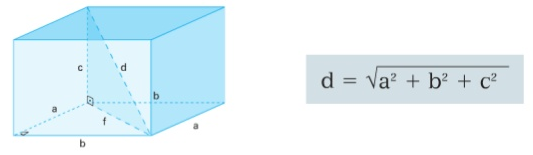

A função objetivo que representa o volume, em termos das dimensões $(a, \ b, \ c)$ pode ser expressa como:

>$V(a,b,c) = a\cdot b\cdot c$

Para expressar a diagonal $d$ em relação às dimensões, podemos fazer algumas relações geométricas (ver figura - triângulo interior):

>$d^{2}=c^{2}+f^{2} \\

f^{2}=a^{2}+b^{2} \\

d^{2}=c^{2}+b^{2}+a^{2}$

Para definir uma restrição, podemos expressar a última equação em relação à uma das dimensões $(c)$:

>$c=\sqrt{d^{2}-a^{2}-b^{2}}$

Então, podemos reescrever o volume como:

>$V(a,b)=ab\sqrt{d^{2}-a^{2}-b^{2}}$

Agora, precisamos maximizar V com as restrições $(a,b >0)$ e $(a^{2}+b^{2}\leq d^{2})$.

Podemos então encontrar os pontos críticos derivando $V$ em relação à $a$ e $b$:

>$V_{a}(a,b)=b\sqrt{d^{2}-a^{2}-b^{2}}-\frac{a^{2}b}{\sqrt{d^{2}-a^{2}-b^{2}}} = \frac{1}{\sqrt{d^{2}-a^{2}-b^{2}}}(d^{2}-2a^{2}-b^{2})b, \\
V_{b}(a,b)=a\sqrt{d^{2}-a^{2}-b^{2}}-\frac{ab^{2}}{\sqrt{d^{2}-a^{2}-b^{2}}}=\frac{1}{\sqrt{d^{2}-a^{2}-b^{2}}}(d^{2}-a^{2}-2b^{2})a$

Lembrando que $a,b \neq  0$, como dito anteriormente, e igualando as 2 últimas equações a zero; teremos que as seguintes relações serão verdadeiras:

>$(d^{2}-2a^{2}-b^{2}) =0,\\

(d^{2}-a^{2}-2b^{2}) =0$

Reescrevendo a primeira equação como $b^{2} =d^{2}-2a^{2}$ e substituindo na segunda equação, temos:

>$
d^{2}-a^{2}-2(d^{2}-2a^{2}) = 0 \\
3a^{2} = d^{2} \\
a = \frac{d}{\sqrt{3}}$

Substituindo $a$ na primeira equação, temos que $b = \frac{d}{\sqrt{3}}$.

Substituindo $a$ e $b$ em $c=\sqrt{d^{2}-a^{2}-b^{2}}$, temos que $c = \frac{d}{\sqrt{3}}$.

Então, temos que o volume máximo é obtido quando:

>$a=b=c=\frac{d}{\sqrt{3}} \\

V_{max}=\left (\frac{d}{\sqrt{3}}  \right )^{3} = \frac{d^{3}}{3\sqrt{3}}$

***Resposta: (5)*** O volume máximo é dado por $V_{max}= \frac{d^{3}}{3\sqrt{3}}$, com dimensões $a=b=c=\frac{d}{\sqrt{3}}$.



# ***Solução alternativa:***

O problema também pode ser resolvido por meio de multiplicadores de Lagrange:

Com $f(a,b,c)=abc;$  $ \ \ g(a,b,c)=a^{2} + b^{2} + c^{2} - d^{2}=0$

Então,

>$\bigtriangledown f(a,b,c)=\left \langle bc,ac,ab \right \rangle, \\
\bigtriangledown g(a,b,c)=\left \langle 2a,2b,2c \right \rangle$

E as equações são:

>$bc=2a\lambda ,\\
ac=2b\lambda ,\\
ab=2c\lambda .$

Logo,

>$abc = 2a^{2}
\lambda =2b^{2}\lambda =2c^{2}\lambda $,

que obtemos ao multiplicar cada equação por $a,b,c;$ respectivamente. 
Então, como $a,b,c>0;$ temos que $\lambda=0$ ou $a=b=c.$

Se $\lambda=0,$ então $a,b$ ou $c=0$; o que não pode ocorrer.

Então, devemos ter $a=b=c$; e, da equação de restrição, significa que:

>$
a=b=c=\frac{d}{\sqrt{3}}
$

E também temos novamente:

>$
V_{max}=\left (\frac{d}{\sqrt{3}}  \right )^{3} = \frac{d^{3}}{3\sqrt{3}}$